<a href="https://colab.research.google.com/github/Dhanya-Abhirami/BuildingDamagePrediction/blob/main/BuildingDamagePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Determining the degree of damage that is done to buildings post an earthquake can help identify safe and unsafe buildings, thus avoiding death and injuries resulting from aftershocks.  Leveraging the power of machine learning is one viable option that can potentially prevent massive loss of lives while simultaneously making rescue efforts easy and efficient.

In this challenge we provide you with the before and after details of nearly one million buildings after an earthquake. The damage to a building is categorized in five grades. Each grade depicts the extent of damage done to a building post an earthquake.

Given building details, your task is to build a model that can predict the extent of damage that has been done to a building after an earthquake.

# Data Description:
You’re give four files: train.csv, test.csv, Building_Ownership_Use.csv and Building_Structure.csv.

Details of the train.csv file:

Variable

Description

area_assesed

Indicates the nature of the damage assessment in terms of the areas of the building that were assessed

building_id

A unique ID that identifies every individual building

damage_grade

Damage grade assigned to the building after assessment (Target Variable)

district_id

District where the building is located

has_geotechnical_risk

Indicates if building has geotechnical risks

has_geotechnical_risk_fault_crack

Indicates if building has geotechnical risks related to fault cracking

has_geotechnical_risk_flood

Indicates if building has geotechnical risks related to flood

has_geotechnical_risk_land_settlement

Indicates if building has geotechnical risks related to land settlement

has_geotechnical_risk_landslide

Indicates if building has geotechnical risks related to landslide

has_geotechnical_risk_liquefaction

Indicates if building has geotechnical risks related to liquefaction

has_geotechnical_risk_other

Indicates if building has any other  geotechnical risks

has_geotechnical_risk_rock_fall

Indicates if building has geotechnical risks related to rock fall

has_repair_started

Indicates if the repair work had started

vdcmun_id

Municipality where the building is located

Details of the remaining files are described in the ReadMe file.

# Submission
A participant has to submit a zip file containing your ‘building_id’ and predicted ‘damage_grade’ in a csv format. Check the sample submission file for format.
```
building_id, damage_grade
a3380c4f75, Grade 3
a338a4e653, Grade 1
a338a4e6b7, Grade 1
a33a6eaa3a, Grade 5
a33b073ff6, Grade 4
```

# Prepare Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

!unzip -u "/content/drive/My Drive/Colab Notebooks/BuildingDamagePrediction/Dataset.zip" -d "/content/drive/My Drive/Colab Notebooks/BuildingDamagePrediction/"

Mounted at /content/drive/
Archive:  /content/drive/My Drive/Colab Notebooks/BuildingDamagePrediction/Dataset.zip


In [3]:
# Plot styling
plt.style.use('ggplot')
%matplotlib inline

# Exploring Data

In [4]:
df_building_str = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BuildingDamagePrediction/Dataset/Building_Structure.csv")
df_building_str.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear


In [5]:
df_building_str.shape

(1052948, 29)

In [6]:
df_building_str.dtypes

building_id                               object
district_id                                int64
vdcmun_id                                  int64
ward_id                                    int64
count_floors_pre_eq                        int64
count_floors_post_eq                       int64
age_building                               int64
plinth_area_sq_ft                          int64
height_ft_pre_eq                           int64
height_ft_post_eq                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_c

In [7]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BuildingDamagePrediction/Dataset/train.csv")
df_train.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


In [8]:
df_train.shape

(631761, 14)

In [9]:
df_train.dtypes

area_assesed                              object
building_id                               object
damage_grade                              object
district_id                                int64
has_geotechnical_risk                    float64
has_geotechnical_risk_fault_crack          int64
has_geotechnical_risk_flood                int64
has_geotechnical_risk_land_settlement      int64
has_geotechnical_risk_landslide            int64
has_geotechnical_risk_liquefaction         int64
has_geotechnical_risk_other                int64
has_geotechnical_risk_rock_fall            int64
has_repair_started                       float64
vdcmun_id                                  int64
dtype: object

In [10]:
df = pd.merge(df_train, df_building_str, on="building_id")
print(df.shape)
df.head()

(631761, 42)


,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Not used
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Not damaged
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Used in risk


In [11]:
df.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id                                     int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


In [12]:
df = df.astype({'district_id_x': 'object','district_id_y': 'object', 'vdcmun_id_x': 'object', 'vdcmun_id_y': 'object', 'ward_id': 'object'})

In [13]:
df_temp = df.isnull().sum().reset_index(name='count')
display(df_temp[df_temp['count'] > 0])
df.dropna(inplace = True)

,index,count
12,has_repair_started,33417


In [14]:
df.shape

(598344, 42)

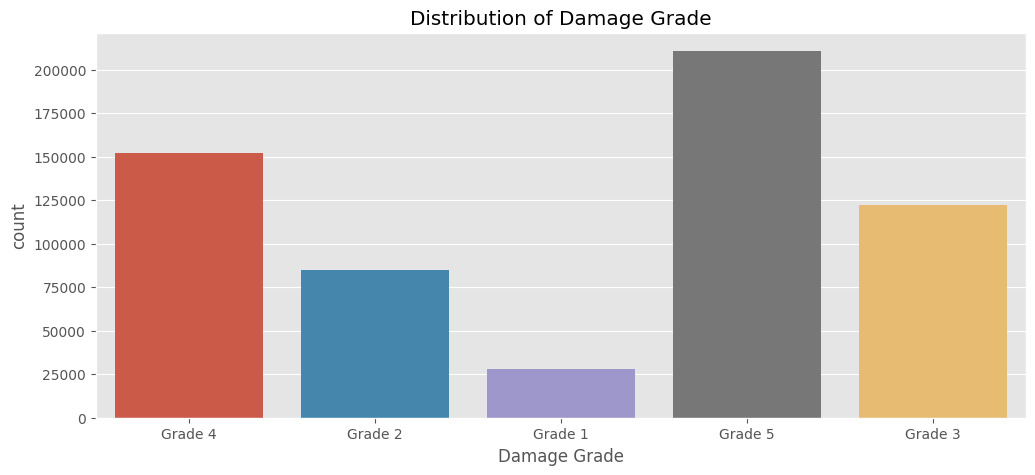

In [15]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_grade', data=df)
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grade")
plt.show()

In [16]:
df.select_dtypes(include=object).dtypes

area_assesed              object
building_id               object
damage_grade              object
district_id_x             object
vdcmun_id_x               object
district_id_y             object
vdcmun_id_y               object
ward_id                   object
land_surface_condition    object
foundation_type           object
roof_type                 object
ground_floor_type         object
other_floor_type          object
position                  object
plan_configuration        object
condition_post_eq         object
dtype: object

In [17]:
def value_counts(field,df):
  plt.figure(figsize = (12,5))
  ax = df[field].value_counts().plot(kind = "bar")
  plt.ylabel("Count")
  plt.xlabel(field)
  plt.title("Number of Buildings by "+field)
  plt.show()
  del ax
  
def get_df_temp(field,df):
  df_temp = df.groupby([field,'damage_grade']).size().reset_index(name='count')
  df_temp = df_temp.set_index([field, 'damage_grade'])
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
  return df_temp

def barplot(field,df):  
  df_temp = get_df_temp(field,df)
  plt.figure(figsize=(12,5))
  ax = sns.barplot(data = df_temp, x = field, y = 'count', hue = 'damage_grade')
  plt.xticks(rotation = 50)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
  plt.title("Distribution of Damage Grade by "+field)
  plt.xlabel(field)
  plt.ylabel("Percentage of Buildings")
  del df_temp, ax
  plt.show()

def heatmap(field,df):  
  df_temp = get_df_temp(field,df)
  df_temp = pd.pivot_table(df_temp, values='count', index=[field], columns='damage_grade')
  plt.figure(figsize=(12,5))
  ax = sns.heatmap(data = df_temp, annot = True )
  plt.xticks(rotation = 50)
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
  plt.title("Distribution of Damage Grade by "+field)
  plt.xlabel("Damage Grade")
  plt.ylabel(field)
  del df_temp, ax
  plt.show()

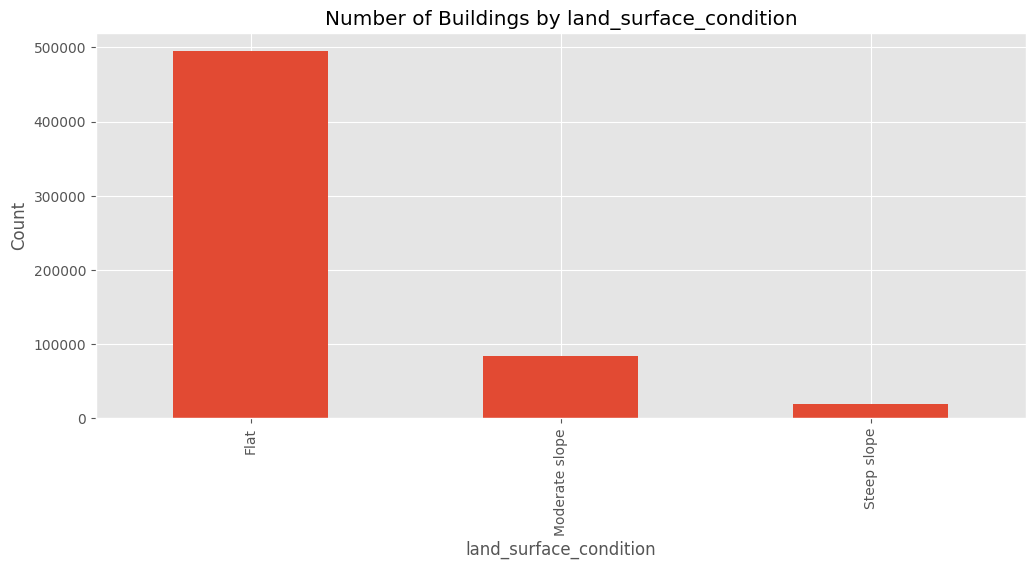

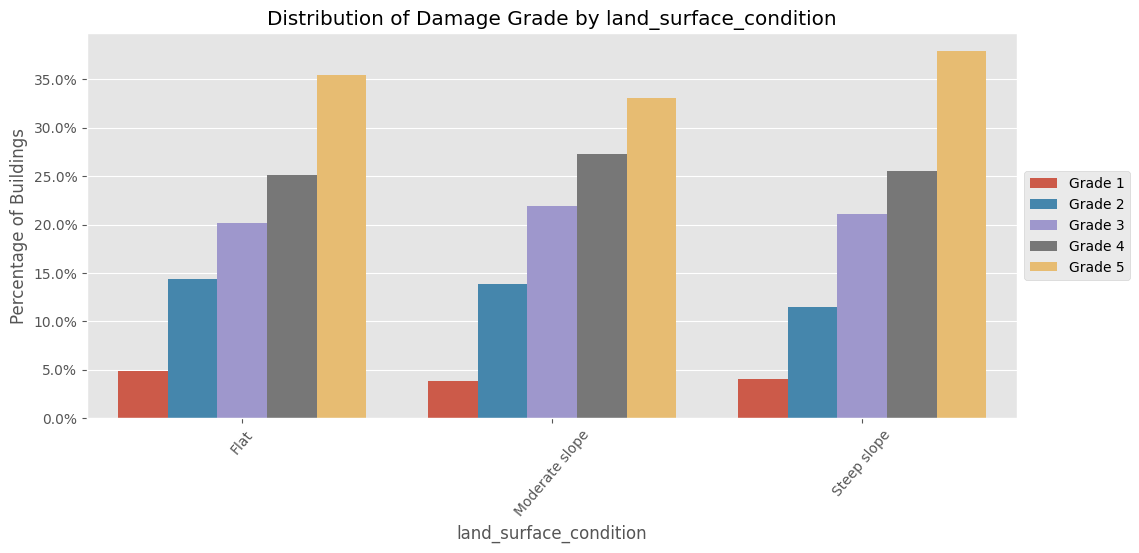

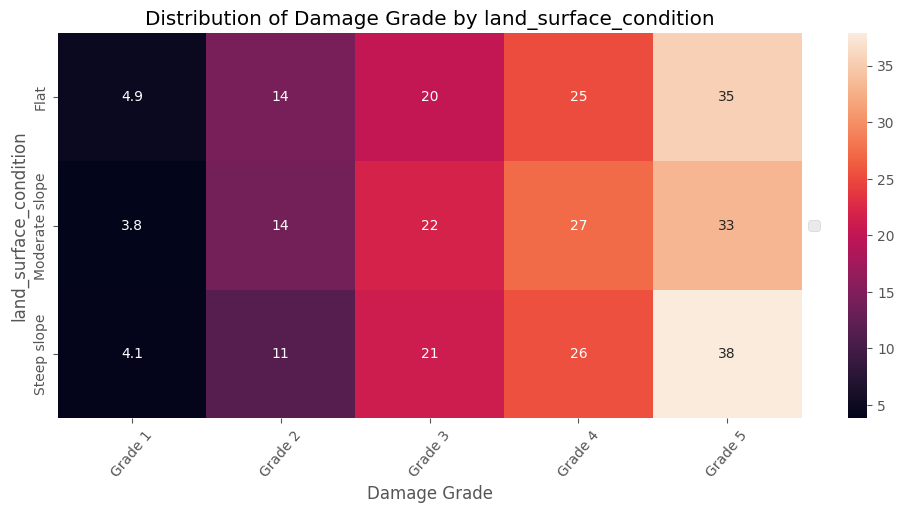

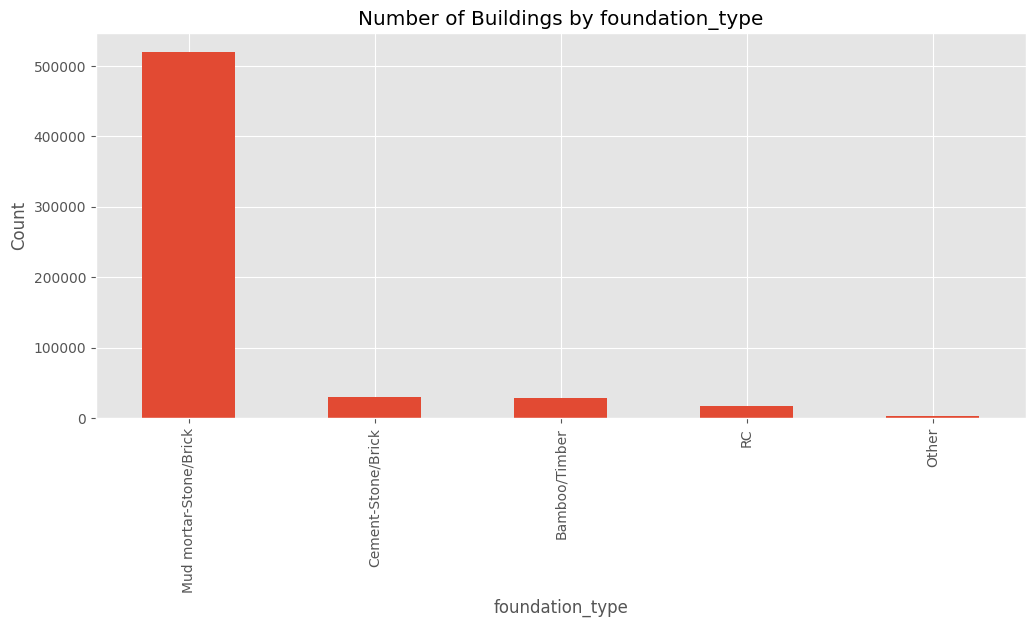

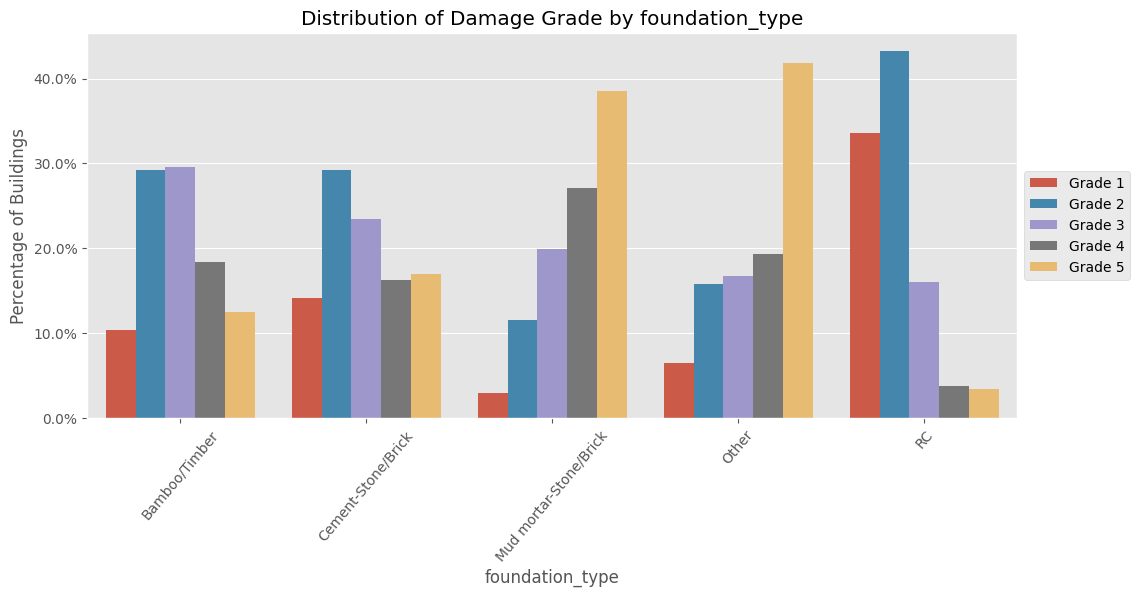

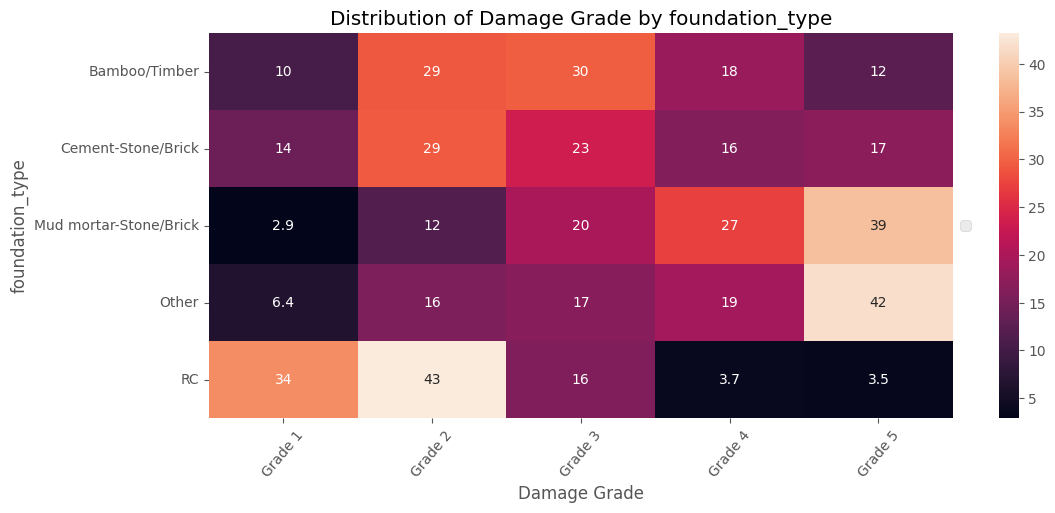

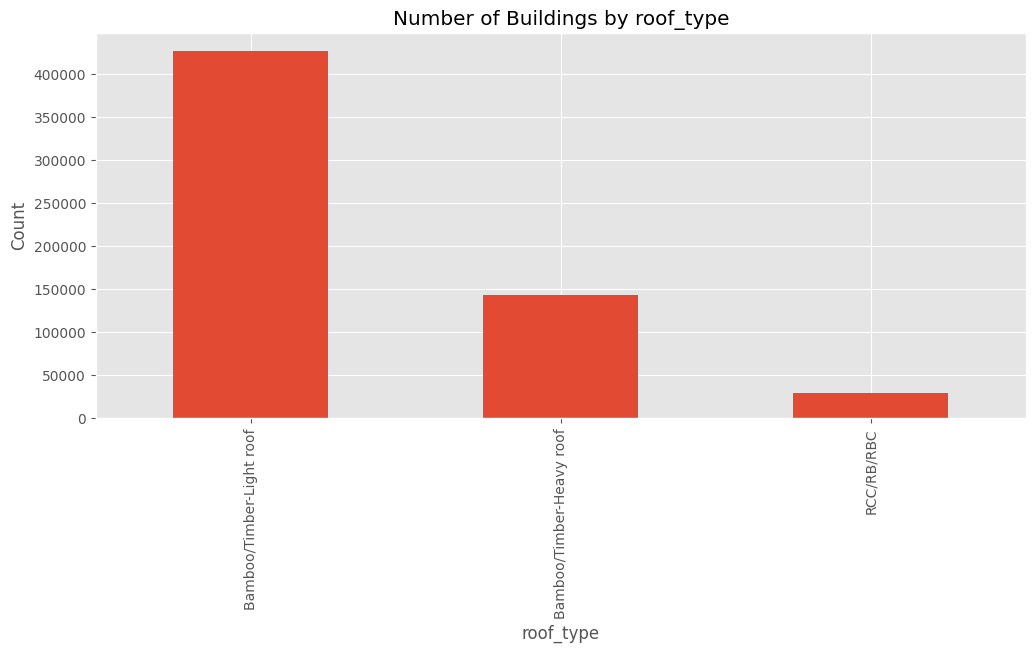

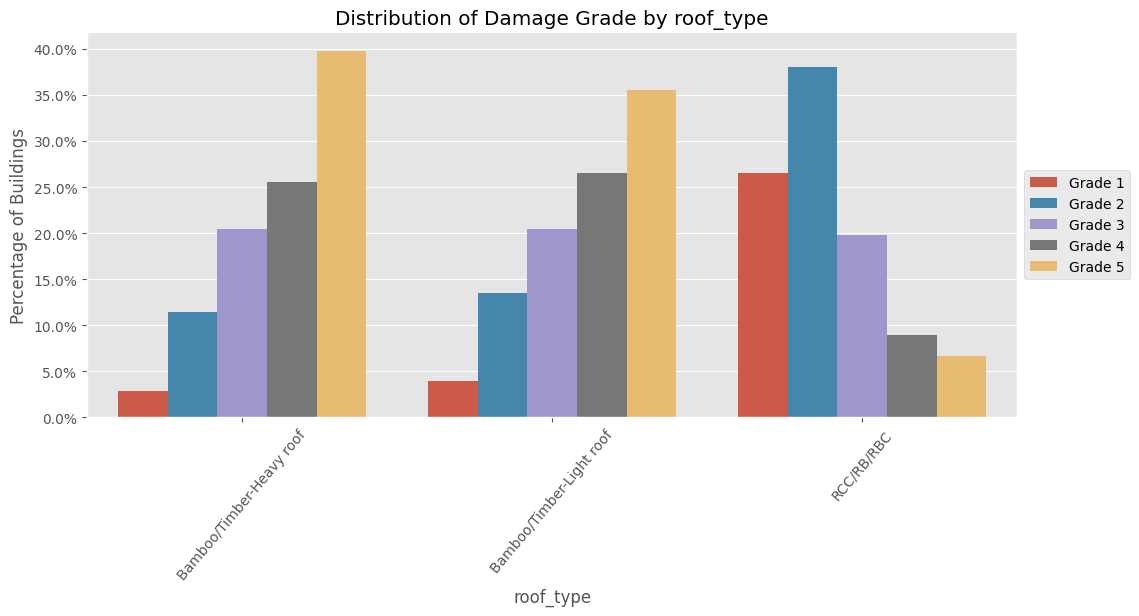

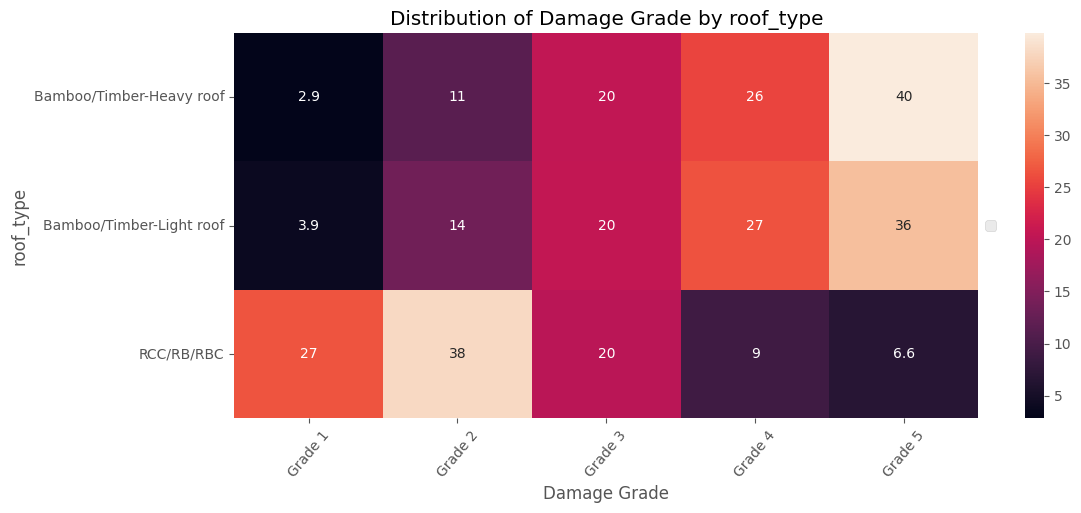

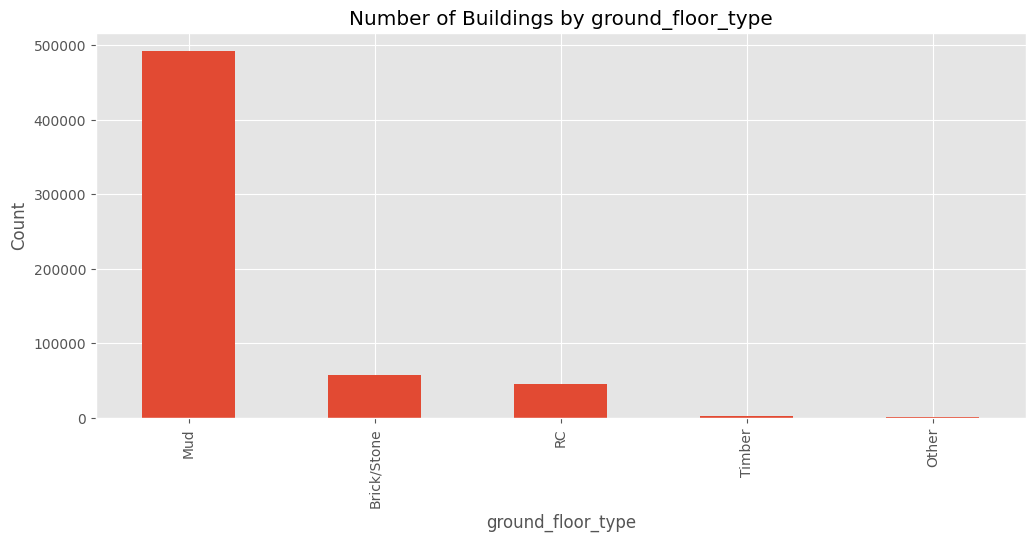

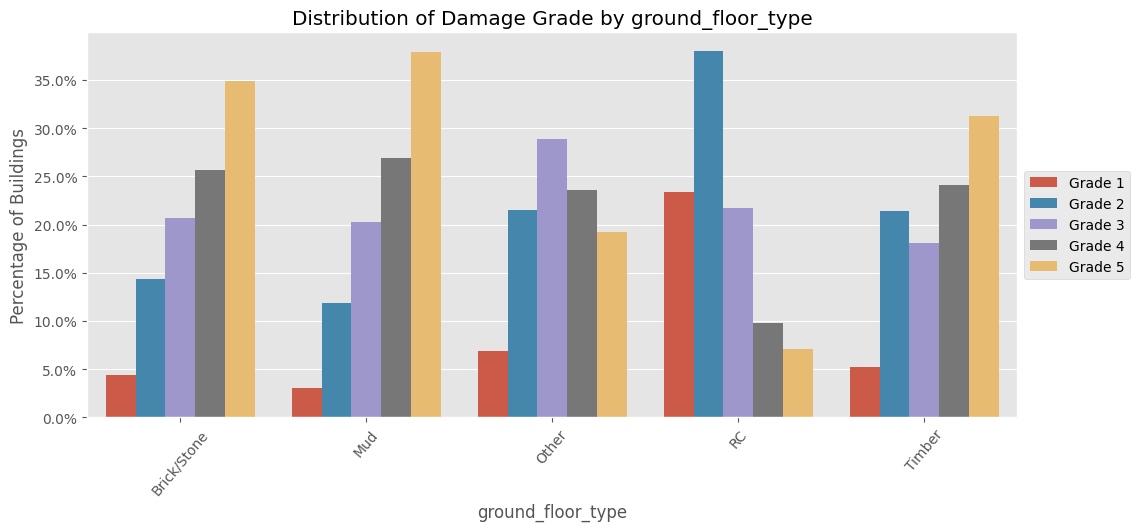

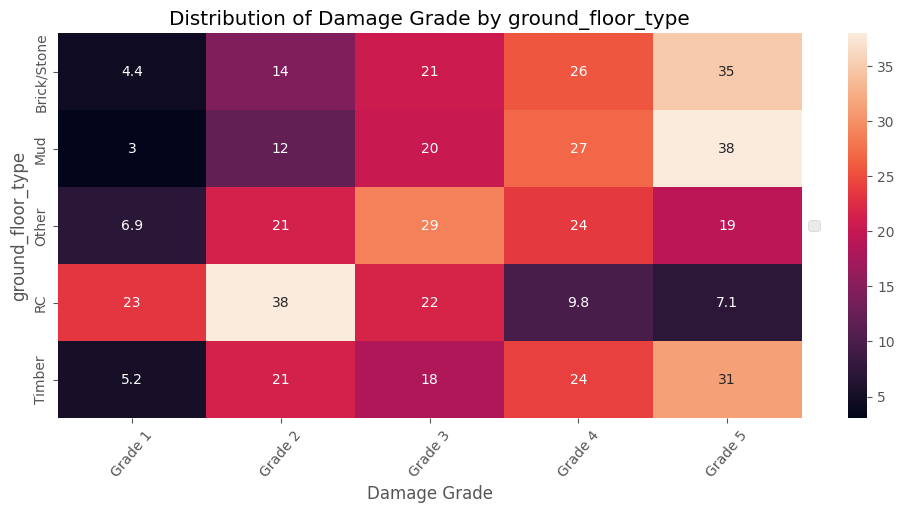

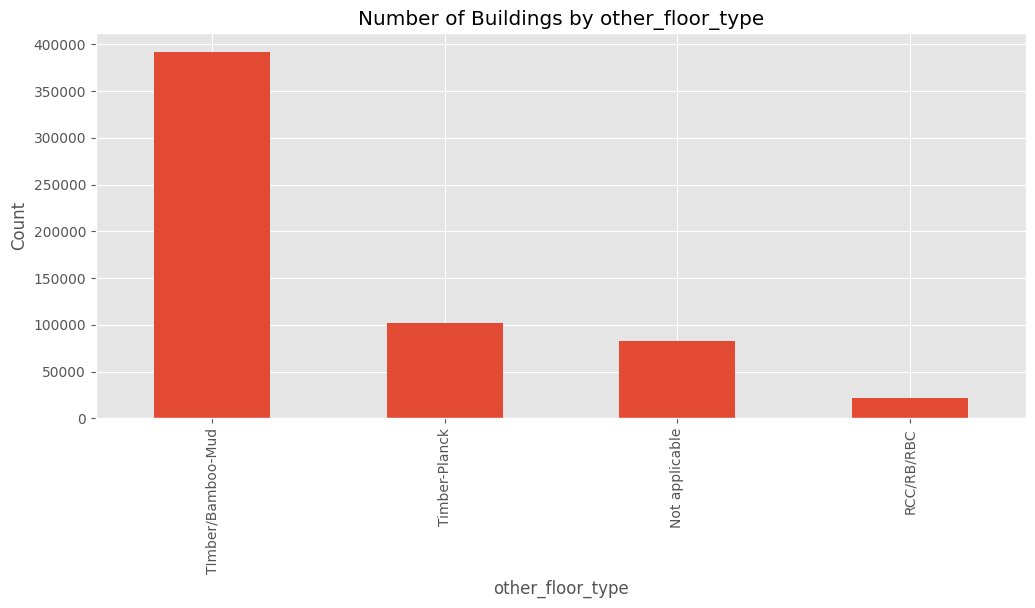

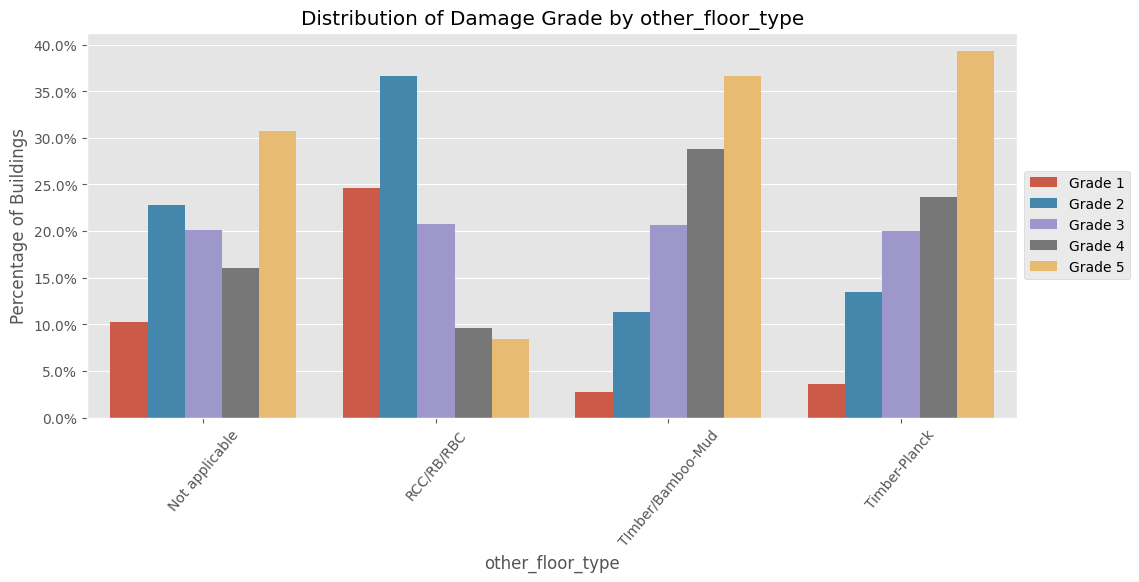

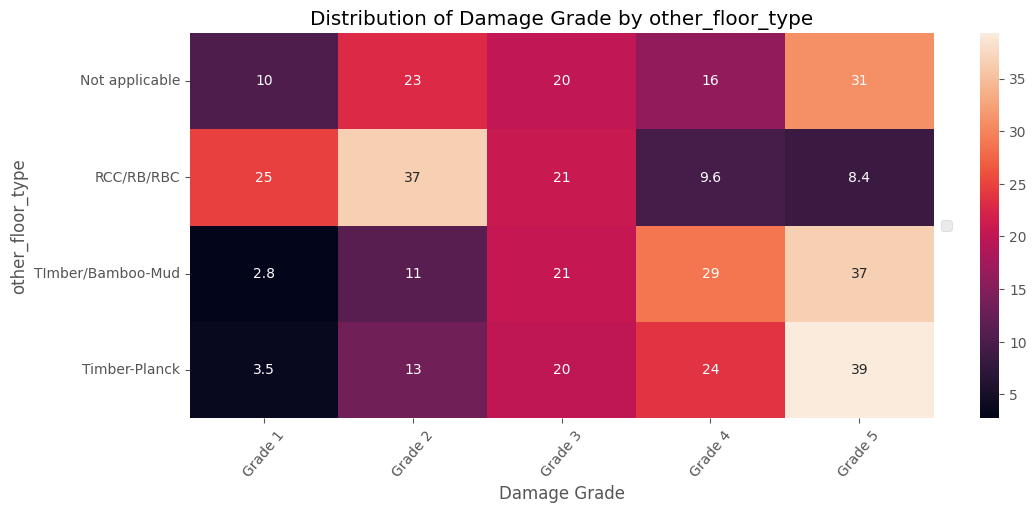

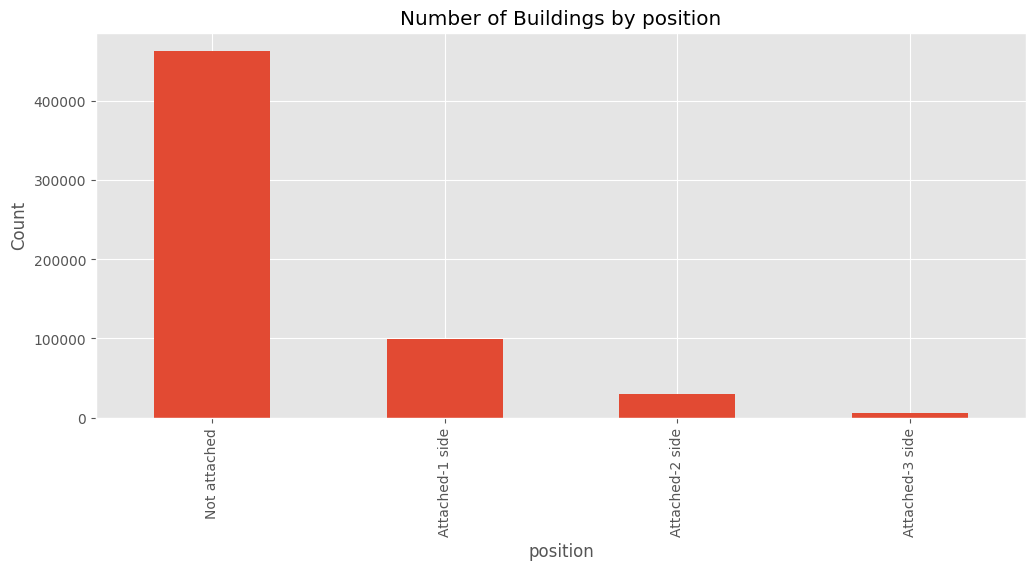

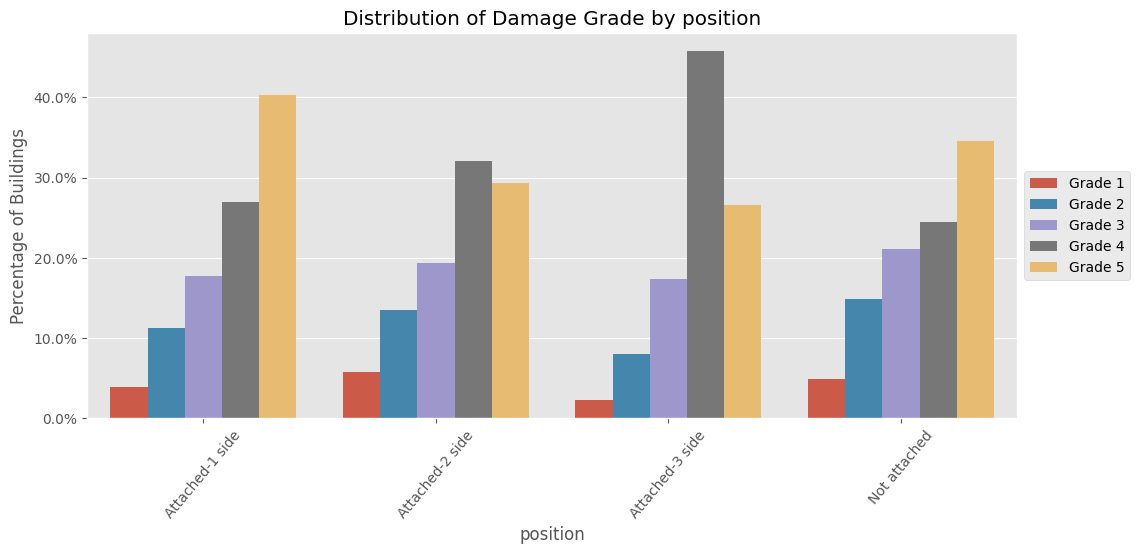

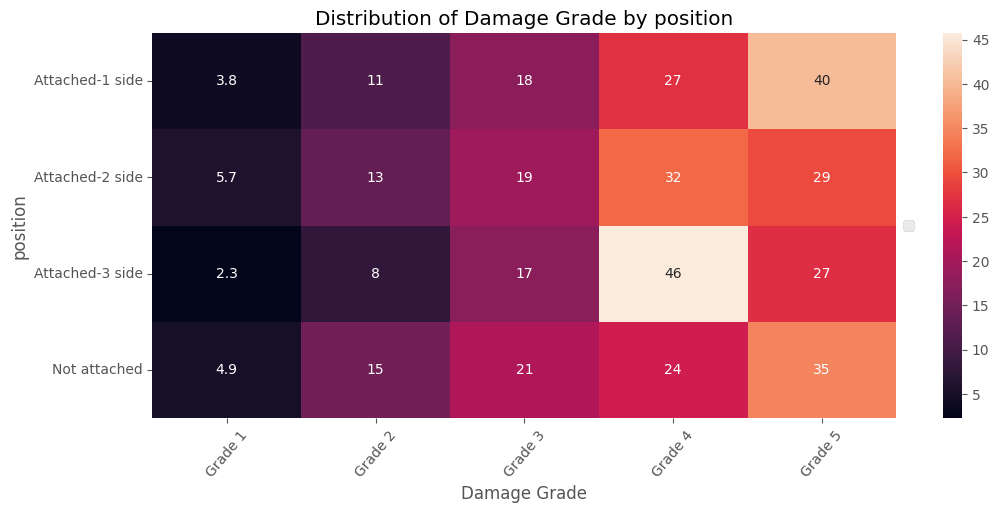

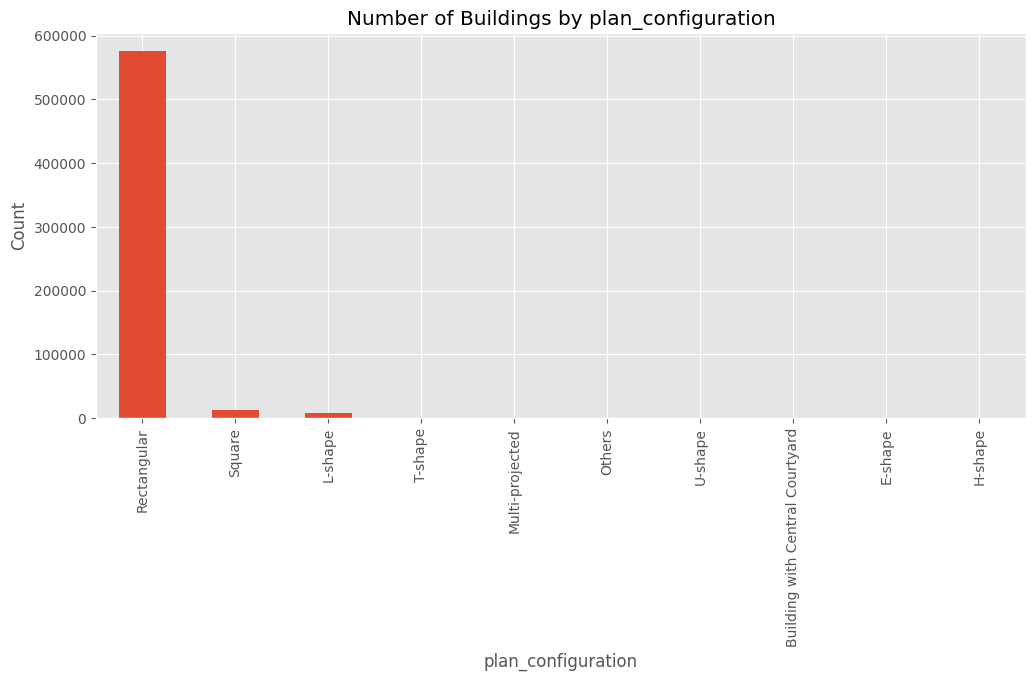

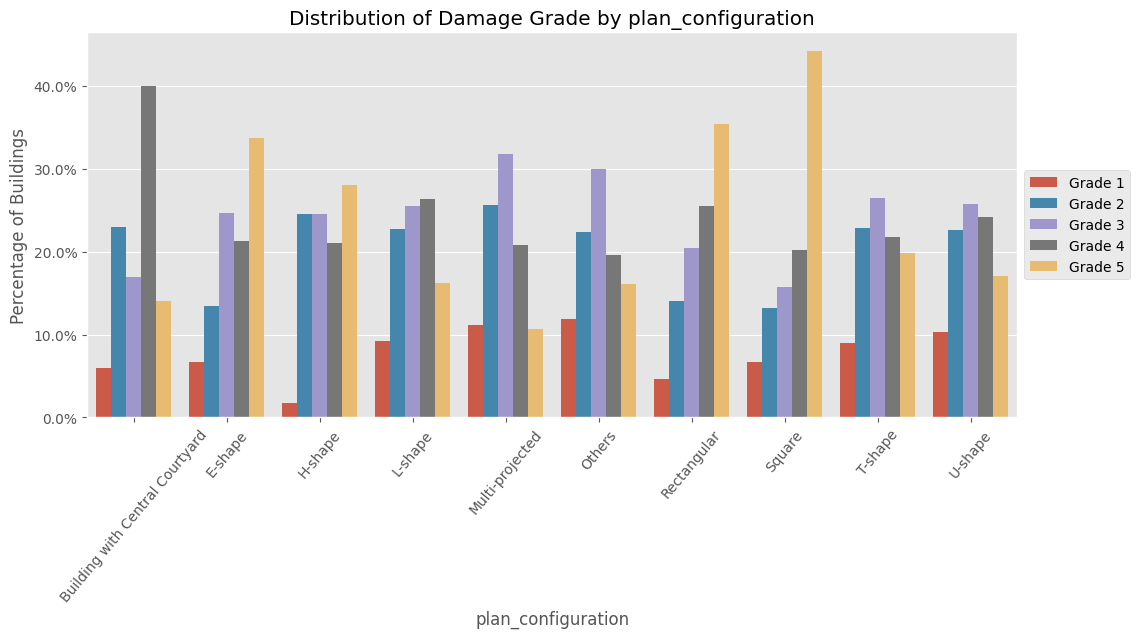

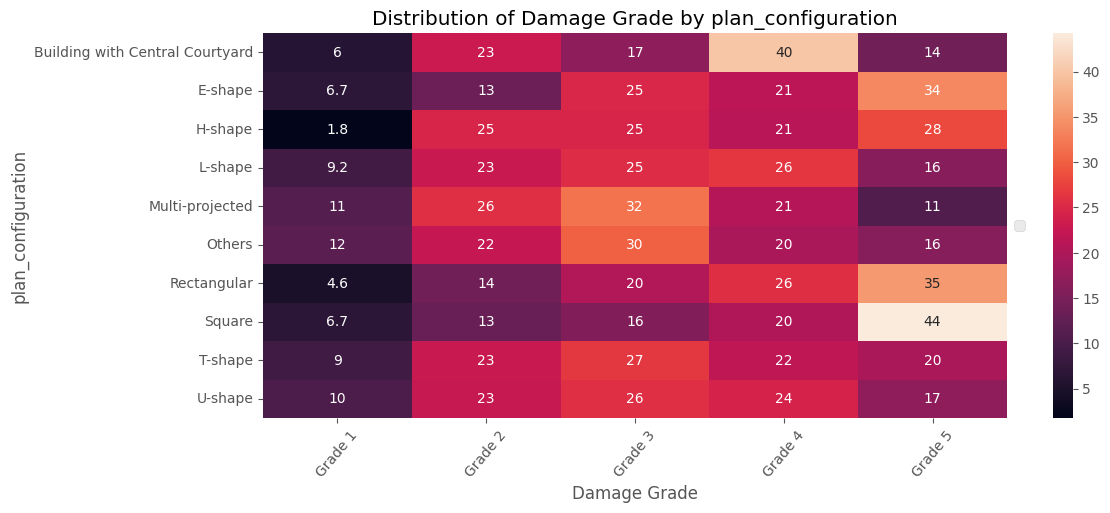

In [18]:
fields = ["land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration"]
for i in range(len(fields)):
  value_counts(fields[i],df)
  barplot(fields[i],df)
  heatmap(fields[i],df)

  

In [19]:
 df.select_dtypes(include=[int,float]).dtypes

has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
height_ft_post_eq                           int64
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [20]:
 df.describe().transpose().drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
has_geotechnical_risk,0.126360,0.332255,0.0,0.0,0.0,0.0,1.0
has_geotechnical_risk_fault_crack,0.044474,0.206147,0.0,0.0,0.0,0.0,1.0
has_geotechnical_risk_flood,0.008741,0.093083,0.0,0.0,0.0,0.0,1.0
has_geotechnical_risk_land_settlement,0.035882,0.185997,0.0,0.0,0.0,0.0,1.0
has_geotechnical_risk_landslide,0.070914,0.256681,0.0,0.0,0.0,0.0,1.0
has_geotechnical_risk_liquefaction,0.002395,0.048880,0.0,0.0,0.0,0.0,1.0
has_geotechnical_risk_other,0.000988,0.031413,0.0,0.0,0.0,0.0,1.0
has_geotechnical_risk_rock_fall,0.035862,0.185947,0.0,0.0,0.0,0.0,1.0
has_repair_started,0.316076,0.464943,0.0,0.0,0.0,1.0,1.0
count_floors_pre_eq,2.148239,0.713706,1.0,2.0,2.0,2.0,9.0


['count_floors_pre_eq', 'height_ft_pre_eq'] {'count_floors_pre_eq': 'count_floors_post_eq', 'height_ft_pre_eq': 'height_ft_post_eq'}


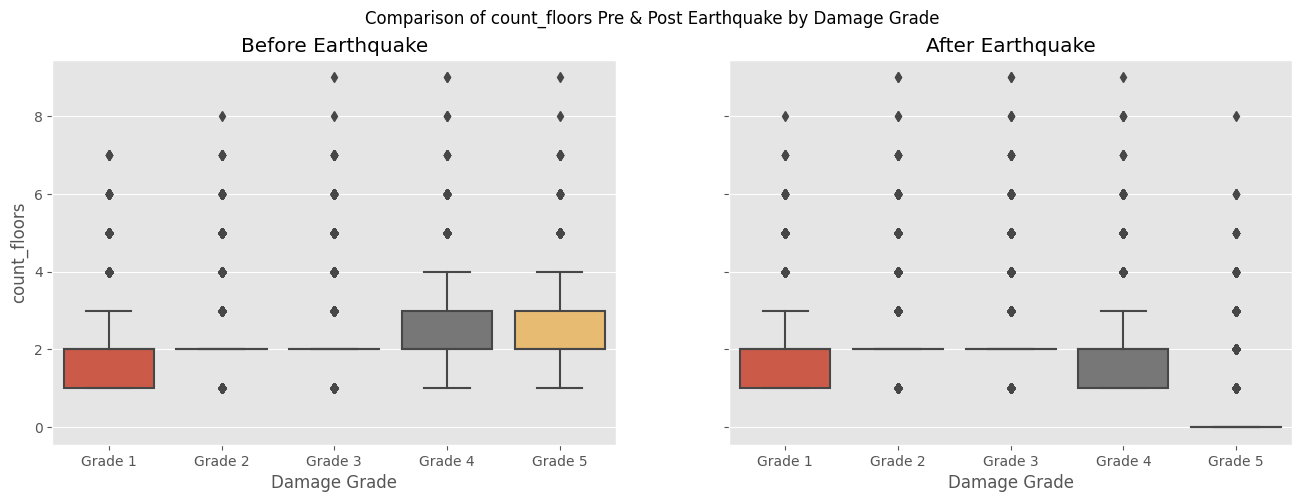

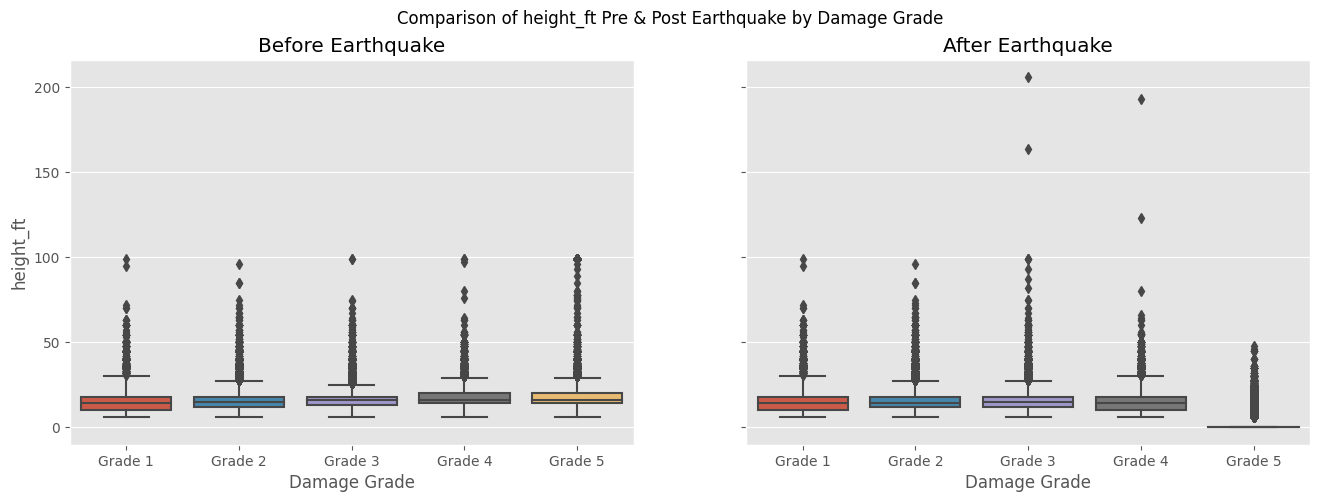

In [28]:
pre_eq_col = [col for col in df if col.endswith('_pre_eq')]
post_eq_col = {}
for c in pre_eq_col:
  for d in df:
    if d.startswith(c.replace('_pre_eq', '')) and d.endswith('post_eq'):
      post_eq_col[c]=d
      break
for i in range(len(pre_eq_col)):  
  title = pre_eq_col[i].replace('_pre_eq', '')
  fig, ax = plt.subplots(1,2,figsize = (16,5), sharey='row')
  fig.suptitle("Comparison of "+ title +" Pre & Post Earthquake by Damage Grade")
  ax[0].set_title("Before Earthquake")
  ax[1].set_title("After Earthquake")
  sns.boxplot(data = df, 
              x = "damage_grade", 
              y = pre_eq_col[i], 
              order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
              ax = ax[0])
  sns.boxplot(data = df, 
              x = "damage_grade", 
              y = post_eq_col[pre_eq_col[i]], 
              order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
              ax = ax[1])
  plt.setp(ax[:], xlabel='Damage Grade')
  plt.setp(ax[0], ylabel=title)
  plt.setp(ax[1], ylabel=None)
  plt.show()

In [ ]:
superstructure_col = [col for col in df if col.startswith('has_superstructure_')]

In [ ]:
geotechnical_risk_col = [col for col in df if col.startswith('has_geotechnical_risk_')]